In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
dir = "../data"
data_files = os.listdir(dir)
thread_files = [s for s in data_files if "thread_scaling" in s and "h5" in s]
thread_files
h5_files = [h5py.File(dir + '/' + f) for f in thread_files]

In [3]:
def avg_time(wt):
    avg_time = np.mean(wt)
    std_time = np.std(wt)
    return (avg_time, std_time)

In [4]:
time_stats = [avg_time(hf["walltimes"][()]) for hf in h5_files]
avg_times = np.array([tup[0] for tup in time_stats])
std_times = np.array([tup[1] for tup in time_stats])

In [5]:
# Get all digits from filenames
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

num_threads = np.array([int(strn.replace('thread_scaling_', '').replace('.h5', '')) for strn in thread_files])
num_threads

array([ 8,  2, 16,  4,  1])

Text(0, 0.5, 'Average wallclock time per step')

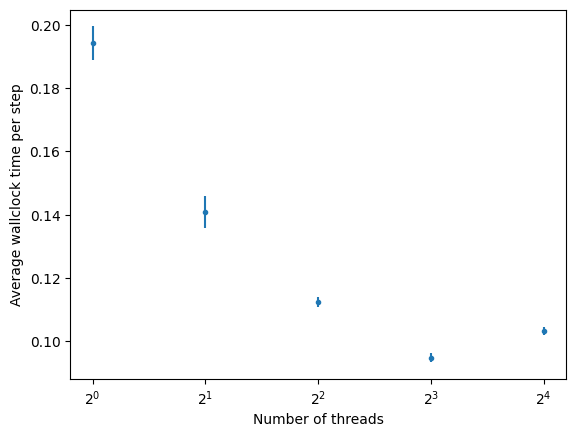

In [6]:
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
#ax.set_yscale('log', base=10)
ax.errorbar(num_threads, avg_times, yerr=std_times, \
            linestyle='', marker='.', label="Measured")
ax.set_xlabel("Number of threads")
ax.set_ylabel("Average wallclock time per step")